In [1]:
#Load all the libraries we will be using
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
#load the breast cancer gene expression dataset into a dataframe
dataframe = pd.read_csv('Data/Cancer/filter_set_gcrma.csv')

In [3]:
#Get the values of the gene expression data
array = dataframe.values

In [4]:
#create an array for the genes and an array for the labels
X= array[:,0:1256] ##1256 variable genes
y=array[:,1321] ##labels

In [5]:
##split data set into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7)

In [6]:
## Create a base decision tree.
clf = tree.DecisionTreeClassifier(class_weight="balanced")

In [7]:
# Create a boosted decision tree
clf_boosted = AdaBoostClassifier(base_estimator=clf,random_state = 7)

In [8]:
# Train and determine accuracy of boosted decision tree
clf_boosted.fit(X_train,y_train)
y_pred=clf_boosted.predict(X_test)
y_pred_prob=clf_boosted.predict_proba(X_test)
print "Accuracy: %.2f"  % metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.84


In [9]:
## Print confusion matrix.
## Contains True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FP)
cfs = metrics.confusion_matrix(y_test, y_pred)
print cfs
TP = cfs[1, 1]
TN = cfs[0, 0]
FP = cfs[0, 1]
FN = cfs[1, 0]

[[13  3]
 [ 6 36]]


In [10]:
## Get the recall, which is the TP/(TP+FN)
print "Recall: %.2f"  % metrics.recall_score(y_test, y_pred)

Recall: 0.86


In [11]:
## Get the precision, which is the TP/(TP+FP)
print "Precision: %.2f"  % metrics.precision_score(y_test, y_pred)

Precision: 0.92


In [12]:
print metrics.roc_auc_score(y_test, y_pred_prob[:,1])

0.834821428571


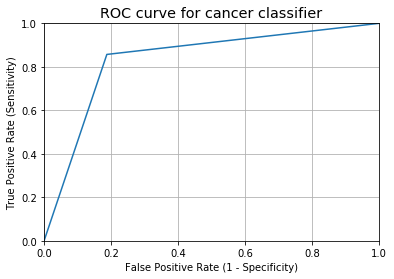

In [13]:
# Perform a ROC test and show plot
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

/home/stephen/miniconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


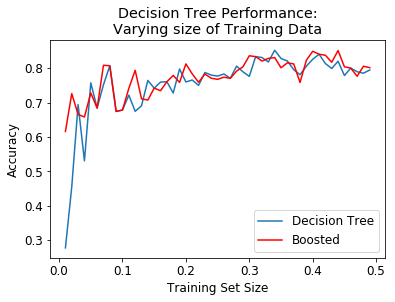

In [14]:
## Compare performance to 
boosted_scores = []
scores = []
train_size = np.arange(0.01,0.5,0.01)
for i in train_size:
	X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i, random_state=7)
	clf_boosted= clf_boosted.fit(X_train,y_train)
	pred = clf_boosted.predict(X_test)
	boosted_scores.append(metrics.accuracy_score(pred,y_test))
	clf = clf.fit(X_train,y_train)
	pred = clf.predict(X_test)
	scores.append(metrics.accuracy_score(pred,y_test))

reg, = plt.plot(train_size,scores,"-",label="Decision Tree")
boost, = plt.plot(train_size,boosted_scores,"-",color="red",label="Boosted")
plt.title('Decision Tree Performance:\nVarying size of Training Data')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(handles=[reg,boost])
plt.show()